In [1]:
import os
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
os.chdir("D:\machine_learning\Image_recognition")
import time

In [2]:
device=torch.device("cpu")

In [3]:
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")
#device=torch.device("cpu")
device

device(type='cuda')

In [4]:
df = pd.read_csv("mnist_train.csv")

In [5]:
df['label'].unique()

array([5, 0, 4, 1, 9, 2, 3, 6, 7, 8], dtype=int64)

In [6]:
for i in range(10):
    print(i,"=",len(np.where(df['label']==i)[0]))

0 = 5923
1 = 6742
2 = 5958
3 = 6131
4 = 5842
5 = 5421
6 = 5918
7 = 6265
8 = 5851
9 = 5949


In [7]:
df.describe()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,60000.000000,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0000,60000.0,60000.0,60000.0,60000.0
mean,4.453933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.200433,0.088867,0.045633,0.019283,0.015117,0.0020,0.0,0.0,0.0,0.0
std,2.889270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.042472,3.956189,2.839845,1.686770,1.678283,0.3466,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.0000,0.0,0.0,0.0,0.0


In [8]:
# cls=np.array(list(set(df["class"])))
# df["class"]=df["class"].apply(clscvrt, args=())

cols =list(df.columns)
cols.remove("label")
cols.append("label")
print(cols)

['1x1',
 '1x2',
 '1x3',
 '1x4',
 '1x5',
 '1x6',
 '1x7',
 '1x8',
 '1x9',
 '1x10',
 '1x11',
 '1x12',
 '1x13',
 '1x14',
 '1x15',
 '1x16',
 '1x17',
 '1x18',
 '1x19',
 '1x20',
 '1x21',
 '1x22',
 '1x23',
 '1x24',
 '1x25',
 '1x26',
 '1x27',
 '1x28',
 '2x1',
 '2x2',
 '2x3',
 '2x4',
 '2x5',
 '2x6',
 '2x7',
 '2x8',
 '2x9',
 '2x10',
 '2x11',
 '2x12',
 '2x13',
 '2x14',
 '2x15',
 '2x16',
 '2x17',
 '2x18',
 '2x19',
 '2x20',
 '2x21',
 '2x22',
 '2x23',
 '2x24',
 '2x25',
 '2x26',
 '2x27',
 '2x28',
 '3x1',
 '3x2',
 '3x3',
 '3x4',
 '3x5',
 '3x6',
 '3x7',
 '3x8',
 '3x9',
 '3x10',
 '3x11',
 '3x12',
 '3x13',
 '3x14',
 '3x15',
 '3x16',
 '3x17',
 '3x18',
 '3x19',
 '3x20',
 '3x21',
 '3x22',
 '3x23',
 '3x24',
 '3x25',
 '3x26',
 '3x27',
 '3x28',
 '4x1',
 '4x2',
 '4x3',
 '4x4',
 '4x5',
 '4x6',
 '4x7',
 '4x8',
 '4x9',
 '4x10',
 '4x11',
 '4x12',
 '4x13',
 '4x14',
 '4x15',
 '4x16',
 '4x17',
 '4x18',
 '4x19',
 '4x20',
 '4x21',
 '4x22',
 '4x23',
 '4x24',
 '4x25',
 '4x26',
 '4x27',
 '4x28',
 '5x1',
 '5x2',
 '5x3',
 '5x

In [9]:
df=df[cols]
df

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
59997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6


In [9]:
train, valid = np.split(df.sample(frac=1), [int(5/6*len(df))])
print(len(train),len(valid))

C:\Users\Kiran M R\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


50000 10000


In [7]:
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y

In [10]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
data_tensor = torch.tensor(X_valid, dtype=torch.float32).to(device)

In [ ]:
# # 10 hidden layer model

# class NeuralNetwork(nn.Module):
#     def __init__(self, input_size, hidden_size, output_size, dropout_prob):
#         super(NeuralNetwork, self).__init__()
        
#         # Define the layers
#         self.hidden1 = nn.Linear(input_size, hidden_size)
#         self.hidden2 = nn.Linear(hidden_size, hidden_size)
#         self.hidden3 = nn.Linear(hidden_size, hidden_size)
#         self.hidden4 = nn.Linear(hidden_size, hidden_size)
#         self.hidden5 = nn.Linear(hidden_size, hidden_size)
#         self.hidden6 = nn.Linear(hidden_size, hidden_size)
#         self.hidden7 = nn.Linear(hidden_size, hidden_size)
#         self.hidden8 = nn.Linear(hidden_size, hidden_size)
#         self.hidden9 = nn.Linear(hidden_size, hidden_size)
#         self.hidden10 = nn.Linear(hidden_size, hidden_size)
#         self.dropout = nn.Dropout(p=dropout_prob)
#         self.output = nn.Linear(hidden_size, output_size)
        
#         # Define activation function (e.g., ReLU)
#         self.activation = nn.ReLU()
    
#     def forward(self, x):
#         x = self.activation(self.hidden1(x))
#         x = self.activation(self.hidden2(x))
#         x = self.activation(self.hidden3(x))
#         x = self.activation(self.hidden4(x))
#         x = self.activation(self.hidden5(x))
#         x = self.activation(self.hidden6(x))
#         x = self.activation(self.hidden7(x))
#         x = self.activation(self.hidden8(x))
#         x = self.activation(self.hidden9(x))
#         x = self.activation(self.hidden10(x))
#         #x = torch.softmax(self.output_layer(x))
#         x = self.dropout(x)
#         x = self.output(x)
#         x=nn.Softmax(dim=1)(x)
#         return x

# # Define the input size, hidden size, and output size
# input_size = len(df.columns)-1  # Change this to match the dimension of your input data)
# hidden_size = 32  # Number of neurons in each hidden layer
# output_size = 3  # Number of output nodes

# # Create an instance of the neural network
# model = NeuralNetwork(input_size, hidden_size, output_size,0.0)

# # You can now use this model for training and making predictions.



In [ ]:
for e in range(len(one_hot_labels)):
    if (np.where(one_hot_labels[e]==max(one_hot_labels[e]))[0][0] == y_train[e]):
        print("")

In [10]:
# 2 hidden layer model
from torch.utils.data import TensorDataset
import torch
import torch.nn as nn
import torch.nn.functional as F

class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, dropout_prob):
        super(NeuralNetwork, self).__init__()
        
        # Define the layers
        self.hidden1 = nn.Linear(input_size, hidden_size)
        self.hidden2 = nn.Linear(int(hidden_size), hidden_size)
        self.dropout = nn.Dropout(p=dropout_prob)
        self.output = nn.Linear(hidden_size, output_size)
        
        # Define activation function (e.g., ReLU)
        self.activation = nn.ReLU()
    
    def forward(self, x):
        x = self.activation(self.hidden1(x))
        x = self.activation(self.hidden2(x))
    
        x = self.dropout(x)
        x = self.output(x)
        x = F.softmax(x, dim=1)  # Use nn.functional.softmax.to(device)
        return x


# Define the input size, hidden size, and output size
input_size = len(df.columns)-1  # Change this to match the dimension of your input data)
hidden_size = 64  # Number of neurons in each hidden layer
output_size = 10  # Number of output nodes
dropout_prob = 0.19
d_p = dropout_prob

# Create an instance of the neural network
model = NeuralNetwork(input_size, hidden_size, output_size,dropout_prob).to(device)
loss_function = nn.CrossEntropyLoss()  # For classification, adjdropout_probt for your specific problemx

data_tensor=X_train
learning_rate= 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

one_hot_labels=np.eye(10)[y_train]
features_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32).to(device)
dataset = TensorDataset(features_tensor, labels_tensor)
c,m=0,0
tim = time.ctime()
tim=tim[11:19]+ '_'+ tim[20:]
name="model_data_" + tim.replace(':', '.') + ".txt"

with open(name, "a") as f:
    f.write("Accuracy (%), Epoch No., Dropout Probability, Learning Rate\n")
    f.write(f'0, 0,{dropout_prob},{learning_rate}\n' )    


NameError: name 'X_train' is not defined

In [ ]:
tim = time.ctime()
tim=tim[11:19]+ '_'+ tim[20:]

In [16]:
from torch.utils.data import DataLoader

batch_size =1024  # Adjust the batch size as needed
shuffle = True   # Set to True if you want to shuffle the data during each epoch

dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=shuffle)

In [ ]:

# num_epochs = 450  # Adjust the number of training epochs as needed
# print("Multiplier:", c+1)
# for epoch in range(num_epochs-m):
    
#     model.train()  # Set the model to training mode

#     for batch_data, batch_labels in dataloader:  # dataloader is a DataLoader object with your training data
#         optimizer.zero_grad()  # Zero the gradients

#         # Forward pass
#         outputs = model(batch_data)
#         loss = loss_function(outputs, batch_labels)

#         # Backpropagation
#         loss.backward()
#         optimizer.step()

#     # Print or log the loss for this epoch
#     print(f'Epoch [{c*num_epochs+m+1}/{num_epochs*(c+1)}], Loss: {loss.item()}')

#     # After training, save the model or use it for predictions
#     torch.save(model.state_dict(), 'your_model.pth')
#     m+=1

# #print("Actual no. of epoch =",c*num_epochs+epoch+1)
# c+=1
# m=0



In [13]:
# data_tensor = torch.tensor(X_valid, dtype=torch.float32).to(device)
# chumma = 0
# Nt=10
# for i in range(Nt):
#     pred=model(data_tensor)
#     pred=pred.to('cpu')
#     pred=pred.detach().numpy()
#     prediction=pred.copy()
#     i=0
#     ind=np.arange(3)
#     index=[]
#     for a in prediction:
#         pred[i]=np.array([0,0,0])
#         #print(a)
#         max_ind=np.argmax(a)
#         index.append(max_ind)

#         #print(max_ind)
#         pred[i][max_ind]=1
#         #print(pred[i])
#         i+=1
        
#     count=0
#     for i in range(len(pred)):
#         if index[i] == y_valid[i]:
#             count+=1
#     chumma += count/len(pred)
#     print(count/len(pred))
# print(f'Average is (%) = {chumma/Nt*100} (epoch = {c*num_epochs+m})')
    

In [6]:
data_tensor = torch.tensor(X_valid, dtype=torch.float32).to(device)
num_epochs = 450  # Adjust the number of training epochs as needed
print("Multiplier:", c+1)

#now_loss = loss.item()
model.train()  # Set the model to training mode

for batch_data, batch_labels in dataloader:  # dataloader is a DataLoader object with your training data
    optimizer.zero_grad()  # Zero the gradients

    # Forward pass
    outputs = model(batch_data)
    loss = loss_function(outputs, batch_labels)

    # Backpropagation
    loss.backward()
    optimizer.step()
    now_loss = loss.item()

for epoch in range(1,num_epochs-m):

    model.train()  # Set the model to training mode

    for batch_data, batch_labels in dataloader:  # dataloader is a DataLoader object with your training data
        optimizer.zero_grad()  # Zero the gradients

        # Forward pass
        outputs = model(batch_data)
        loss = loss_function(outputs, batch_labels)

        # Backpropagation
        loss.backward()
        optimizer.step()
        
    pre_loss = now_loss
    now_loss = loss.item()
    
    if (now_loss > pre_loss and now_loss <0.5):
        learning_rate = learning_rate * 0.999
        d_p = d_p * 1.005
    else:
        learning_rate = learning_rate * 1.0005
        d_p = d_p * 0.9995


    model.dropout.p = d_p
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
    # model=new_model
    # new_model = NeuralNetwork(input_size, hidden_size, output_size,d_p_new).to(device)
    # # Copy the weights from the pre-trained model to the new model
    # new_model.load_state_dict(model.state_dict())

    # optimizer = torch.optim.SGD(new_model.parameters(), lr=lr_new)

    # Print or log the loss for this epoch
    curr_epo=c*num_epochs+m+1
    print(f'Epoch [{curr_epo}/{num_epochs*(c+1)}], Loss: {loss.item()}')

    # After training, save the model or use it for predictions
    torch.save(model.state_dict(), 'your_model.pth')


    if((curr_epo)%20<0.1):
        ##data_tensor = torch.tensor(X_valid, dtype=torch.float32).to(device)

        cx = 0
        Nt=10
        for k in range(Nt):
            pred=model(data_tensor)
            pred=pred.to('cpu')
            pred=pred.detach().numpy()
            prediction=pred.copy()
            i=0
            index=[]
            for a in prediction:
                pred[i]=np.zeros(10)
                #print(a)
                max_ind=np.argmax(a)
                index.append(max_ind)

                #print(max_ind)
                pred[i][max_ind]=1
                #print(pred[i])
                i+=1
            seriyavatha_index = []  
            count=0
            for q in range(len(pred)):
                if index[q] == y_valid[q]:
                    count+=1
                elif k == Nt:
                    seriyavatha_index.append(q)
            cx += count/len(pred)
            #print(count/len(pred))
        print(f'Average is (%) = {cx/Nt*100} (epoch = {curr_epo})')
        with open(name, "a") as f:
            f.write(f'{cx/Nt*100},{curr_epo},{d_p},{learning_rate})\n')

    m+=1

#print("Actual no. of epoch =",c*num_epochs+epoch+1)
c+=1
m=0



NameError: name 'X_valid' is not defined

In [11]:
model = NeuralNetwork(input_size, hidden_size, output_size,0.010301559888315062).to(device)
model.load_state_dict(torch.load('your_model.pth'))
model.eval()

NeuralNetwork(
  (hidden1): Linear(in_features=784, out_features=64, bias=True)
  (hidden2): Linear(in_features=64, out_features=64, bias=True)
  (dropout): Dropout(p=0.010301559888315062, inplace=False)
  (output): Linear(in_features=64, out_features=10, bias=True)
  (activation): ReLU()
)

In [19]:
# Load the model
model = torch.load('your_model.pth', map_location='cpu')
# Set the model to evaluation mode
model.eval()

AttributeError: 'collections.OrderedDict' object has no attribute 'eval'

In [23]:
df_test= pd.read_csv("mnist_test.csv")
df_test=df_test[cols]
test, X_test, y_test = scale_dataset(df_test, oversample=False)

In [30]:
data_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
pred=model(data_tensor)
pred=pred.to('cpu')
pred=pred.detach().numpy()
prediction=pred.copy()
print(prediction)
i=0
index=[]
for a in prediction:
    pred[i]=np.zeros(10)
    #print(a)
    max_ind=np.argmax(a)
    index.append(max_ind)

    #print(max_ind)
    pred[i][max_ind]=1
    #print(pred[i])
    i+=1
    seriyavatha_index = []  
    count=0
    #print(len(prediction))
    #print("index = ",(index))
for q in range(len(prediction)):
        # print(q)
    if index[q] != y_test[q]:
        seriyavatha_index.append(q)

print((len(prediction)-len(seriyavatha_index))/len(pred)*100)


[[1.8734524e-11 1.0432565e-11 1.7782051e-13 ... 1.0000000e+00
  7.1541013e-15 2.9073233e-10]
 [5.2873669e-17 1.4705744e-14 1.0000000e+00 ... 3.6734479e-18
  2.3770729e-18 2.9539843e-26]
 [1.3146395e-07 9.9990344e-01 7.4422564e-06 ... 1.5099377e-05
  3.8790819e-05 2.4970692e-08]
 ...
 [1.8254178e-18 2.6345400e-14 1.4237332e-16 ... 2.5588076e-14
  2.0871430e-11 5.4254962e-10]
 [1.2230220e-14 2.8062127e-18 1.6715713e-21 ... 1.0240407e-18
  1.5436679e-07 2.7538831e-11]
 [4.7421633e-12 7.2658116e-17 2.7725416e-14 ... 7.2086395e-16
  1.3552216e-18 1.7056517e-22]]
96.71


In [95]:
len(prediction)

10000

In [88]:
y_valid[5]

4

In [25]:
len(seriyavatha_index)

9015

In [30]:
seriyavatha_index

[44,
 282,
 475,
 497,
 553,
 581,
 602,
 695,
 749,
 782,
 792,
 796,
 874,
 909,
 961,
 1010,
 1049,
 1152,
 1222,
 1408,
 1465,
 1704,
 1711,
 1720,
 1741,
 1750,
 1871,
 1986,
 2106,
 2116,
 2125,
 2368,
 2503,
 2545,
 2697,
 2804,
 2827,
 2965,
 3025,
 3118,
 3200,
 3224,
 3252,
 3296,
 3306,
 3353,
 3377,
 3605,
 3849,
 3901,
 3920,
 3984,
 4007,
 4141,
 4161,
 4293,
 4338,
 4417,
 4629,
 4639,
 4766,
 4783,
 4837,
 5083,
 5090,
 5118,
 5127,
 5326,
 5339,
 5346,
 5482,
 5529,
 5679,
 5689,
 5761,
 5942,
 6062,
 6106,
 6217,
 6323,
 6405,
 6438,
 6440,
 6449,
 6640,
 6771,
 6810,
 6929,
 6975,
 7016,
 7149,
 7157,
 7248,
 7278,
 7287,
 7316,
 7374,
 7425,
 7544,
 7628,
 7670,
 7710,
 7766,
 7988,
 8004,
 8036,
 8098,
 8145,
 8395,
 8397,
 8609,
 8685,
 8777,
 8948,
 9012,
 9129,
 9275,
 9290,
 9308,
 9362,
 9444,
 9713]

In [70]:
X_valid[12]

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -1.00005000e-02,
       -1.50569941e-02, -2.08415144e-02, -3.35956355e-02, -3.90764292e-02,
       -4.11755570e-02, -3.77639845e-02, -2.97887932e-02, -2.71279202e-02,
       -3.09015909e-02, -3.10889675e-02, -2.94205646e-02, -2.28962748e-02,
       -1.90509469e-02, -1.64526251e-02, -1.51102177e-02, -1.00005000e-02,
        0.00000000e+00,  

In [104]:
valid[seriyavatha_index[7]][784]

2.0

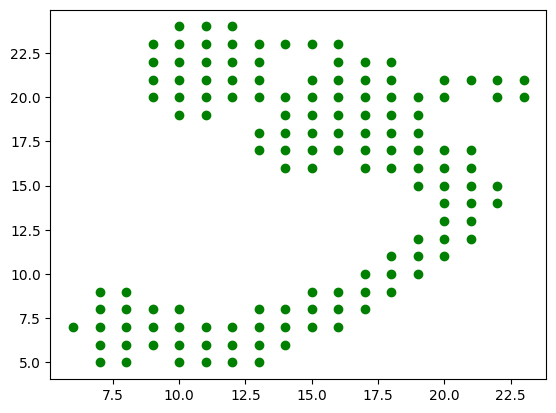

In [103]:
# Thettiya_y = y_valid[seriyavatha_index]
# Thettiya_x = X_valid[seriyavatha_index]
import matplotlib.pyplot as plt
#naam = df.columns[:-1]
#x=np.arange(1,28)

for o in range(len(X_valid[0])):
    if (valid[seriyavatha_index[7]][o]>.5):
        plt.scatter((o+1)%28,int((o+1)/28)+1, color='green')

plt.show()

# entha type cheyyande

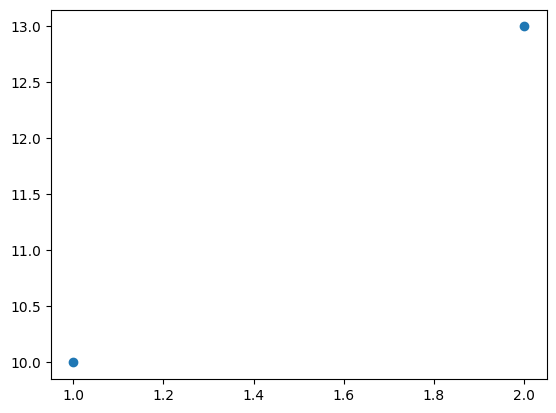

In [28]:
plt.scatter([1,2],[10,13])
plt.show()

lr = 0.028
dropout_prob = 0.05

In [20]:
f.close()

In [31]:
!pip install Pillow



[notice] A new release of pip is available: 23.3 -> 23.3.1
[notice] To update, run: C:\Users\Kiran M R\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [62]:
from PIL import Image

def image_to_matrix(image_path):
    # Open the image file
    img = Image.open(image_path)

    # Convert the image to grayscale (optional)
    img = img.convert('L')

    # Get the pixel data as a 2D matrix
    pixel_matrix = list(img.getdata())

    # Reshape the matrix to the image size
    width, height = img.size
    pixel_matrix = [pixel_matrix[i * width:(i + 1) * width] for i in range(height)]

    return pixel_matrix

# Example usage
image_path = '7.png'
matrix = list(image_to_matrix(image_path))
ind=0
# for m in matrix:
#     m=m[::-1]
#     matrix[ind]=m
#     ind+=1
matrix=matrix[::-1]
# Now 'matrix' contains the pixel data as a 2D matrix
matrix=np.array(matrix).reshape((1,-1))[0]
matrix

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0, 255, 255, 255, 255, 255,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0, 255, 255, 255, 255, 255, 255, 255, 25

In [64]:
matrix
i=0
for element in matrix:
    if element > 200:
        matrix[i]=1 
    else:
        matrix[i]=0 
    i+=1

In [65]:
for i in range(28):
    print(matrix[(i)*28:(i+1)*28])


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0]
[0 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0]
[0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0]
[0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0]
[0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0]
[0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0]
[0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0]
[0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0]
[0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0]
[0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0]
[0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0]
[0 0 0 0 1 1 1

In [56]:
data_tensor_2 = torch.tensor([matrix], dtype=torch.float32).to(device)
pred=model(data_tensor_2)
pred=pred.cpu()
print(pred)
print(np.where(pred[0]==max(pred[0]))[0][0])

tensor([[1.8683e-03, 7.9070e-06, 9.5431e-03, 9.2309e-01, 2.5828e-04, 2.3143e-03,
         3.5909e-06, 2.6368e-05, 4.2692e-04, 6.2461e-02]],
       grad_fn=<ToCopyBackward0>)
3
